### **INN Hotels - Problem Statement**
#### **Description**
#### **Context**
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.



#### **Objective**
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


#### Import all the necessary libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import GridSearchCV

#### Load the dataset

In [117]:
df = pd.read_csv('/content/INNHotelsGroup.csv')

#### Data Overview

In [118]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [119]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [121]:
print('There are',df.shape[0],'Rows and', df.shape[1], 'columns')

There are 36275 Rows and 19 columns


In [122]:
pd.DataFrame({'Count': df.isnull().sum()})

,Count
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [123]:
duplicates=df.duplicated().sum()
duplicates

0

#### Exploratory Data Analysis (EDA)

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Observations:
* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have two years of data, 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

#### Univariate Analysis

In [125]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [126]:
# creating label barplots with a function
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  e

    plt.show()

Number of adults

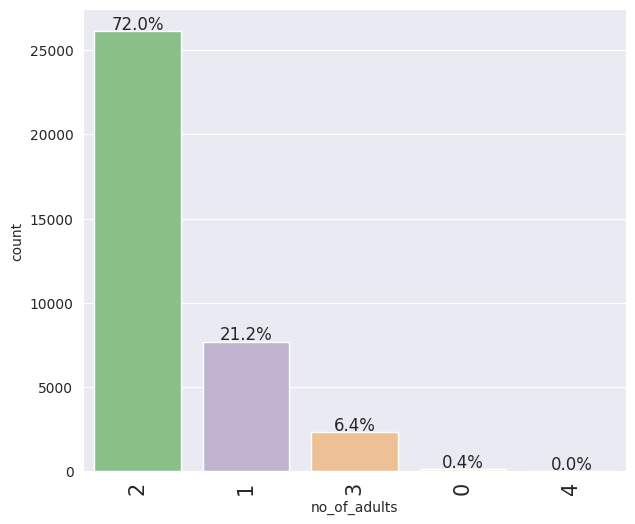

In [127]:
labeled_barplot(df,'no_of_adults', perc=True)

Observations:
* 72% of the bookings include 2 adults.
* bookings with just 1 adult are thw 21.2%
* 3 adults have 6.4%
* bookings that do not include adults are the 0.4%


Number of Children

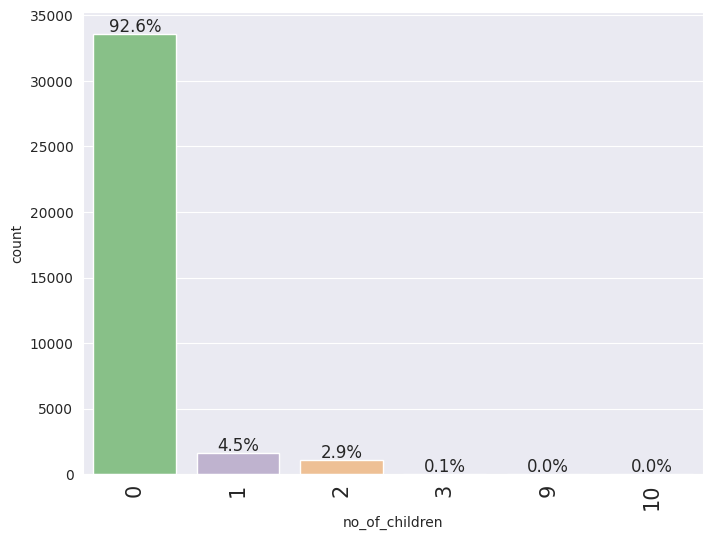

In [128]:
labeled_barplot(df,'no_of_children', perc=True)

In [129]:
df['no_of_children'].value_counts()

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


In [130]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

Observations:
* 92.6% of the bookings do not include any children, following by those that include one children(4.5%) and 2 children(2.9%)

Number of weekend nights

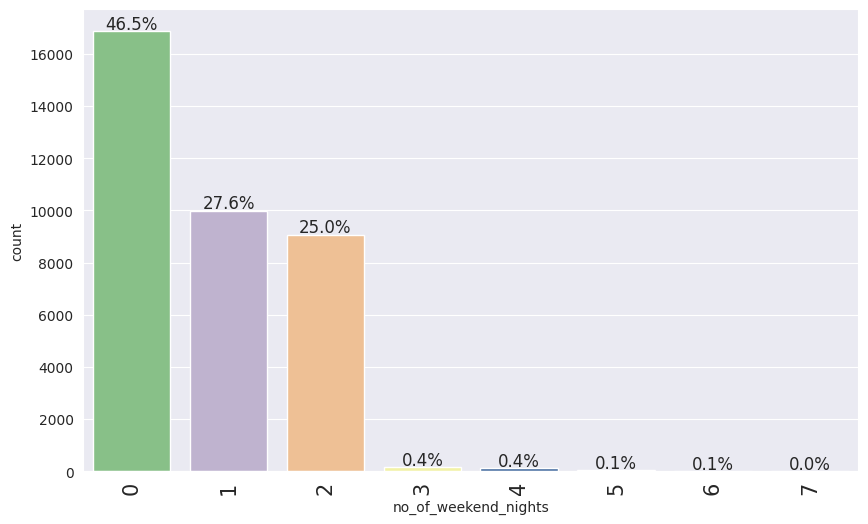

In [131]:
labeled_barplot(df,'no_of_weekend_nights', perc=True)

In [132]:
df['no_of_weekend_nights'].value_counts()

,count
no_of_weekend_nights,
0,16872
1,9995
2,9071
3,153
4,129
5,34
6,20
7,1


Observations:
* 46.5% of the bookings do not included a night during the weekend. Then 1 night during the weekend have the 27.6% and 2 nights 25%.

Number of week nights

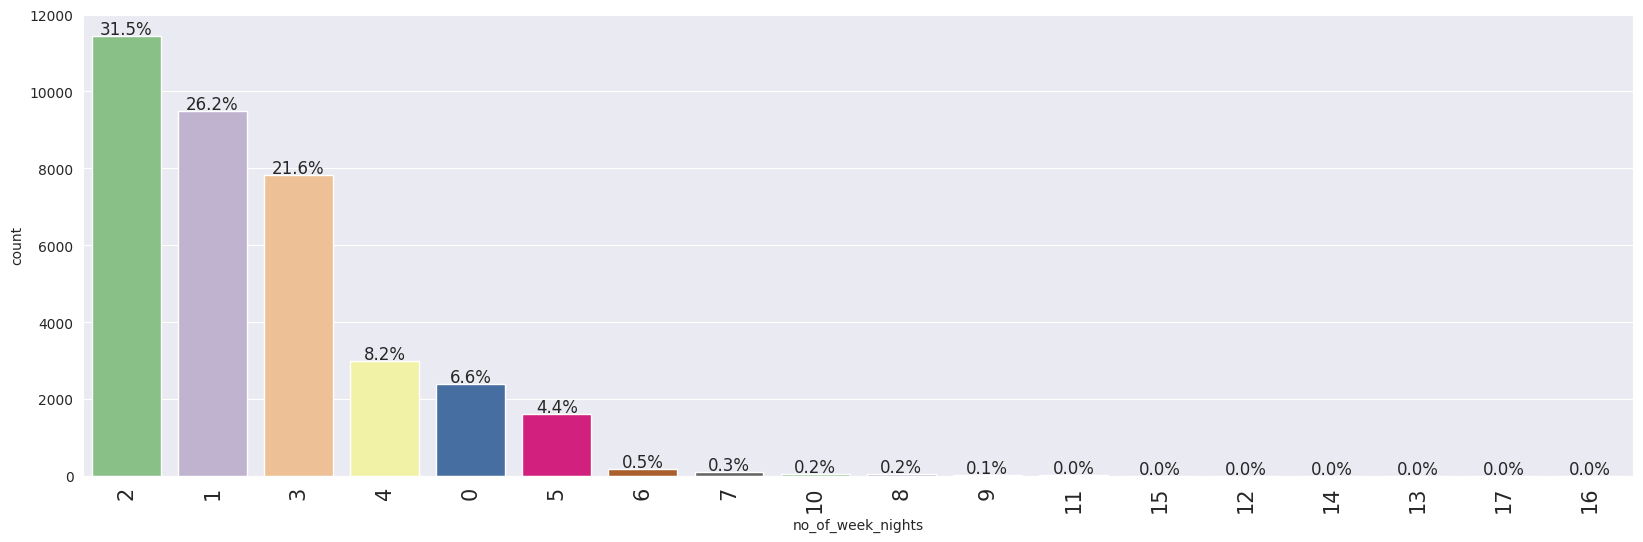

In [133]:
labeled_barplot(df, 'no_of_week_nights', perc=True)

Observations:
* 31.5% of the booking include two nights during the week.
* 26.2% include 1 nights during the week and 21,6% 3 nights.

In [134]:
df["no_of_week_nights"] = df["no_of_week_nights"].replace([11,15,12,14,13,17,16], 9) #replacing the 0.0 values with 9 value.

Meal Plan

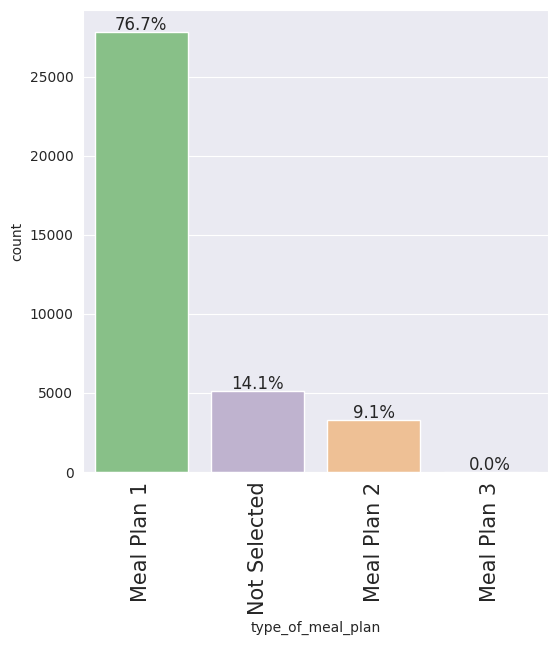

In [135]:
labeled_barplot(df,'type_of_meal_plan', perc=True)

Observations:
* 76.7% of the bookings have chosen the meal plan 1 that include just breakfast
* 14.1% have chosen the Meal Plan 2, breakfast and one other meal.

Require Parking

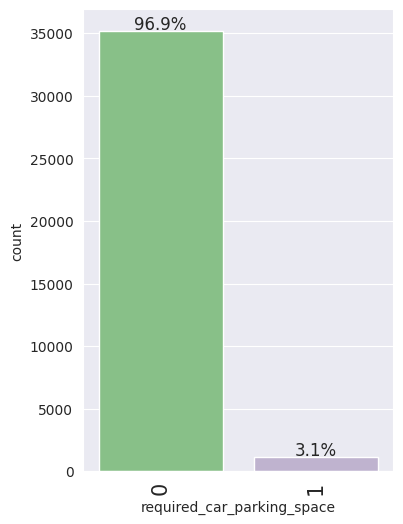

In [136]:
labeled_barplot(df,'required_car_parking_space', perc=True)

In [137]:
df['required_car_parking_space'].value_counts()

,count
required_car_parking_space,
0,35151
1,1124


Observations:
* The visualization shows that approximately 3.1% of the bookings, corresponding to 1124 reservations, required parking.

Type of Room reserved

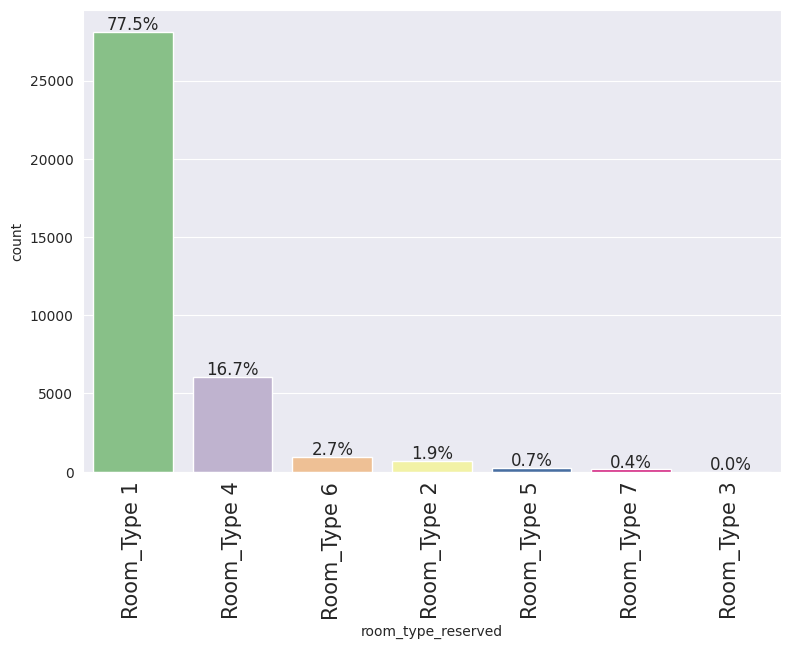

In [138]:
labeled_barplot(df,'room_type_reserved', perc=True)

Observations:
* Room type 1 is the most popular at 77.5%

In [139]:
df['room_type_reserved'].value_counts()

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


Observations:
* We can see among the bookings Room_Type 1 is being the most preferred(approximately 85% of the total) and Room_Type 3 being the least common, it has just 7 reservations.

Lead Time

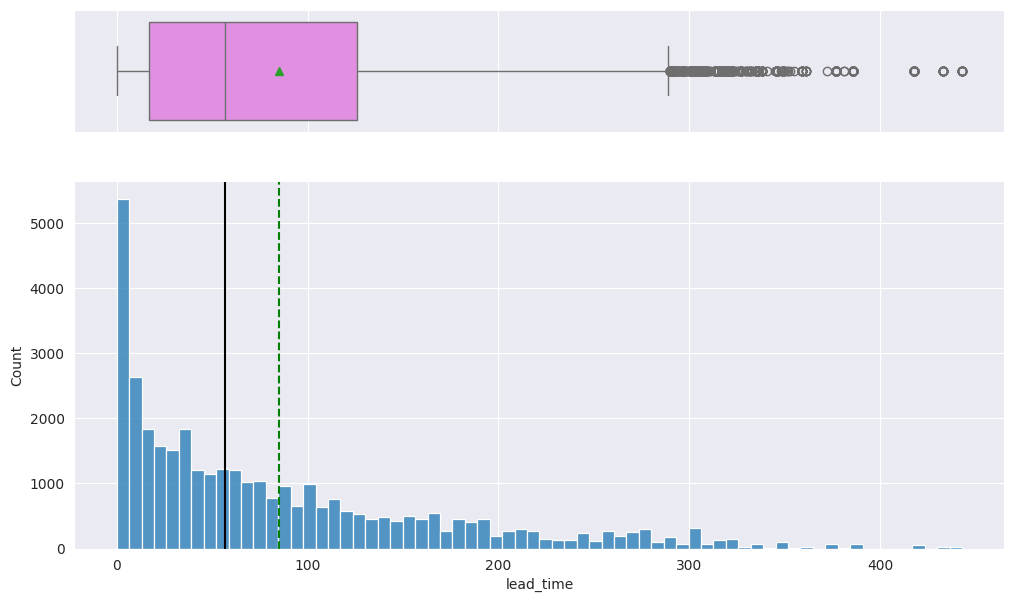

In [140]:
histogram_boxplot(df,'lead_time')

Observations:
* Distribution is right skewed with outliers towards the high end of the lead day range.
* The average of days between the booking and arrival date is 85 days. This suggests that, on average, guests make their reservations about three months in advance of their arrival.
* 75% of the bookings have a lead of 126 or less days, which indicate that the majority of customers make their reservations within four months of their arrival date.

Arrival Year

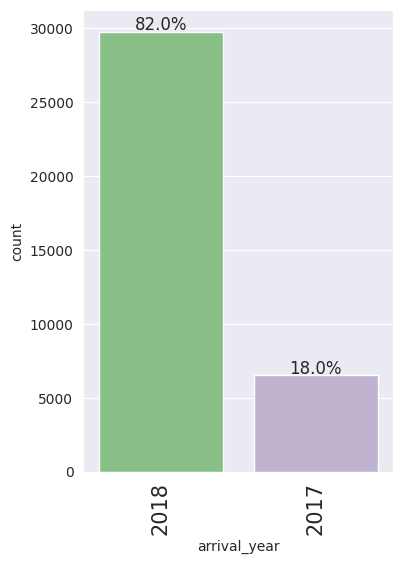

In [141]:
labeled_barplot(df,'arrival_year', perc=True)

Observations:
* We can see approximately 82% of the bookings are in 2018

Arrival Month

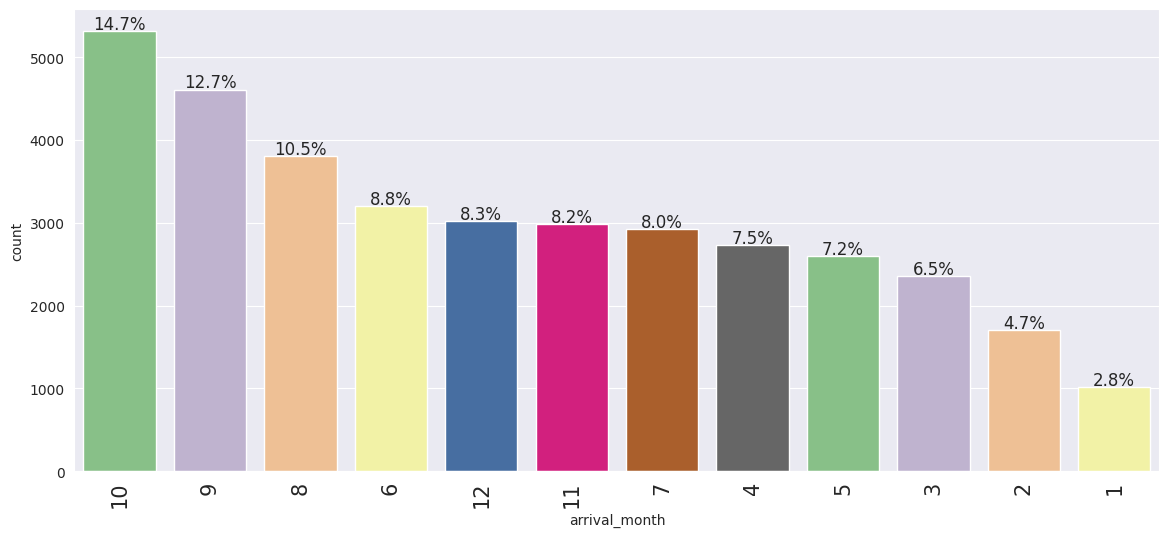

In [142]:
labeled_barplot(df,'arrival_month', perc=True)

In [143]:
df['arrival_month'].value_counts()

,count
arrival_month,
10,5317
9,4611
8,3813
6,3203
12,3021
11,2980
7,2920
4,2736
5,2598


Observations:
* We can see it may be a seasonal pattern in the booking behavior. The number of bookings starts to increase from August(10.5% of the bookings), reaching its peak in October with 14.7% bookings. This period likely corresponds to a popular travel season or event.

* After October, the number of bookings gradually decreases, with November still showing a relatively high number of bookings (8.2%). However, there is a significant decline in December, January, and February, with January having the lowest number of bookings (2.8%). This may be related to unfavorable weather conditions during the winter season.

Arrival Date

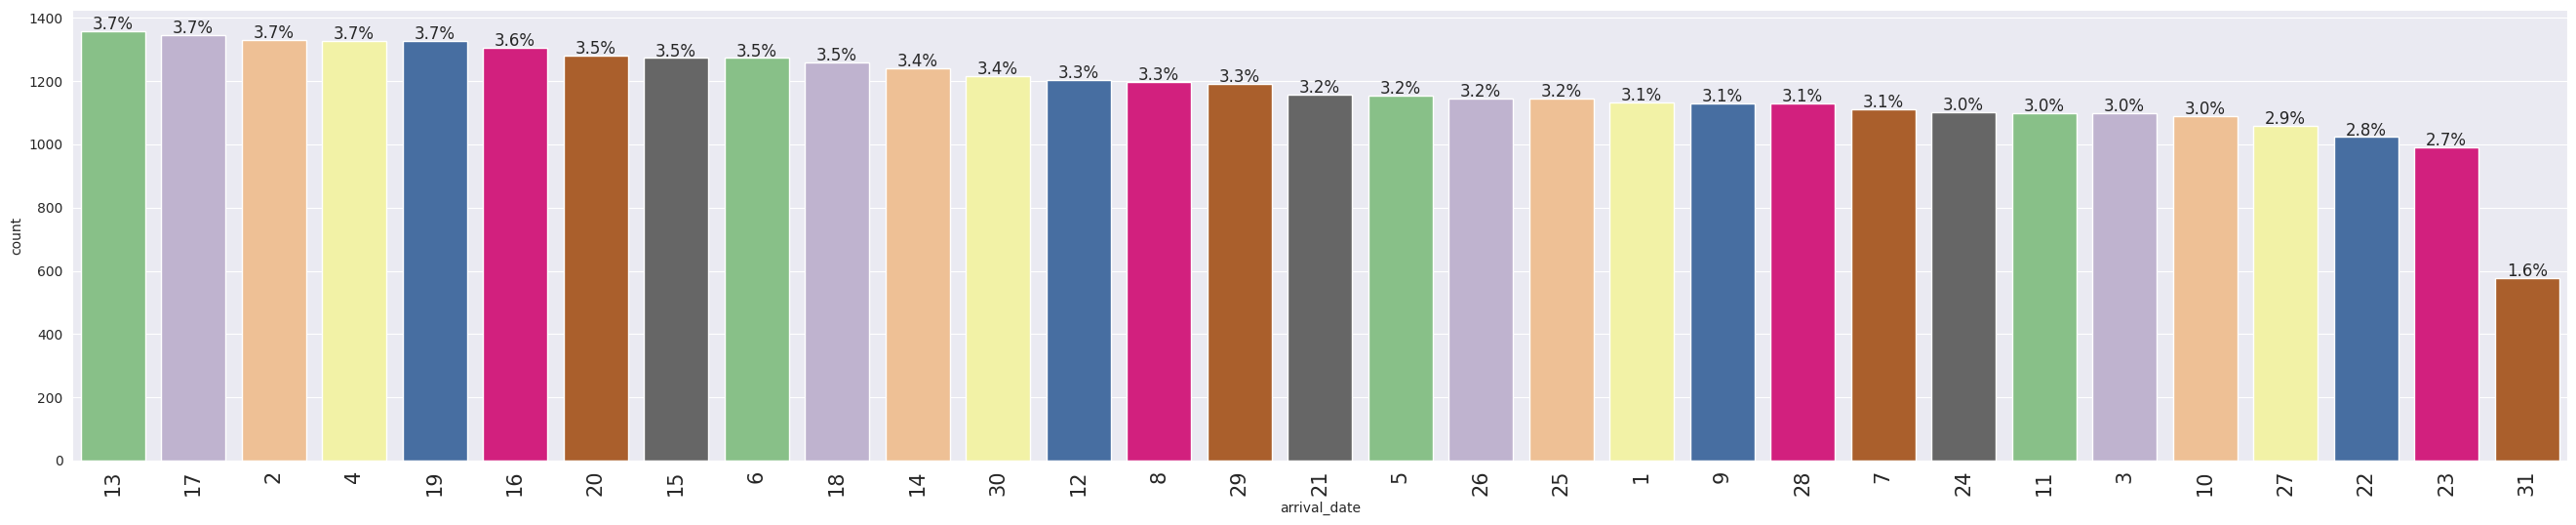

In [144]:
labeled_barplot(df,'arrival_date', perc=True)

In [145]:
df['arrival_date'].value_counts()

,count
arrival_date,
13,1358
17,1345
2,1331
4,1327
19,1327
16,1306
20,1281
15,1273
6,1273


Observations:
* The distribution of arrival days appears to be fairly uniform, with small differences between them. However, it is worth noting that the day 31st has only 1.6% of the total arrivals. This lower percentage could be attributed to the fact that only 7 months in a year have 31 days, affecting the number of arrivals on this day.

* Among the arrival days, the 13th has the highest number of arrivals, 1,358. Following closely behind is the 17th, along with the 2nd, 4th, and 19th, all of which also have a significant number of bookings.

Market Segment type

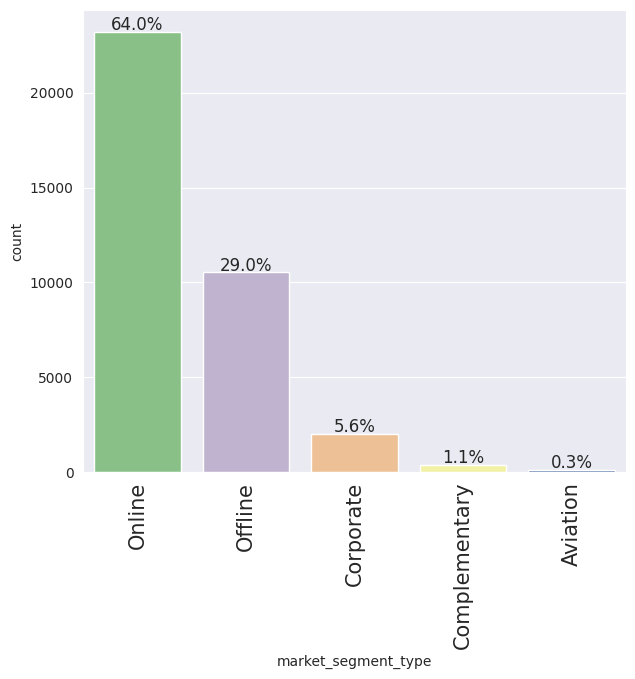

In [146]:
labeled_barplot(df,'market_segment_type', perc=True)

In [147]:
df['market_segment_type'].value_counts(normalize=True).mul(100)

,proportion
market_segment_type,
Online,63.994487
Offline,29.022743
Corporate,5.560303
Complementary,1.077877
Aviation,0.344590


Observations:
* The majority of bookings, approximately 63.99%, are made throuth "Online" market segment.

* The second most popular market segment is "Offline," with approximately 29.02% of the bookings. This suggests that a considerable number of bookings were made through offline channels, such as telephone reservations or walk-in bookings.

* The "Corporate" market segment has around 5.56% of the bookings. This indicates that a smaller proportion of bookings were made by corporate clients, possibly for business purposes.

* The "Complementary" market segment has a low representation,(1.08% of the bookings).

* Aviation market segment has the lowest numbers, with only 0.34% of the bookings

Repeated Guest

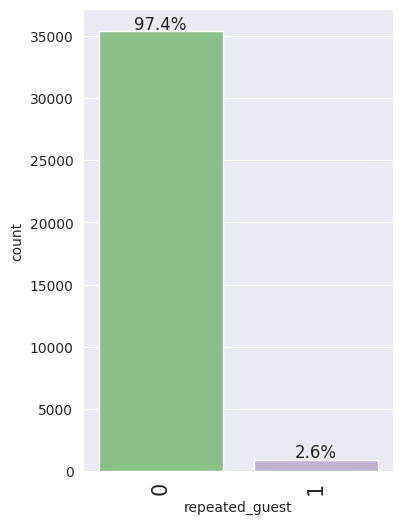

In [148]:
labeled_barplot(df,'repeated_guest', perc=True)

Observations:

The majority of customers, approximately 97.44%, have not booked more than once, with 35,345 bookings.

A small proportion of guests, approximately 2.56%, have booked more than once, representing around 930 bookings. This indicates that a this customers has shown loyalty or preference for the booking platform, hotel, or service.

Number of previous cancellations

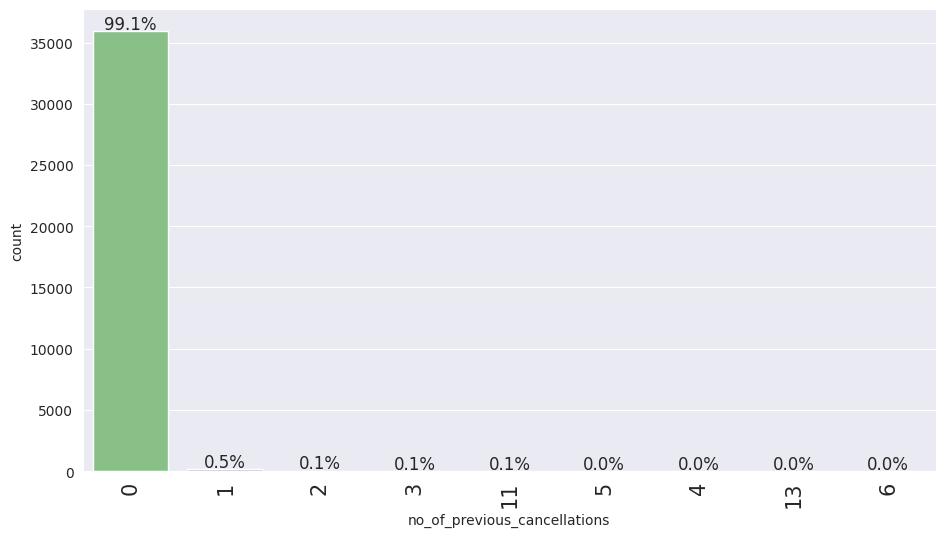

In [149]:
labeled_barplot(df,'no_of_previous_cancellations', perc=True)

In [150]:
df['no_of_previous_cancellations'].value_counts()

,count
no_of_previous_cancellations,
0,35937
1,198
2,46
3,43
11,25
5,11
4,10
13,4
6,1


Observations:
* The majority of customers have not cancelled a previous booking, approximately 95.2%.

* 198 customers(0.5%) have canceled 1 previous booking. This indicates that some customers have experienced cancellations in their booking history before making the current booking. The counts decrease progressively as the number of previous cancellations increases, with fewer customers having multiple cancellations.

* Approximately 140 guests have canceled more than 2 times.

Number of previous bookings not canceled

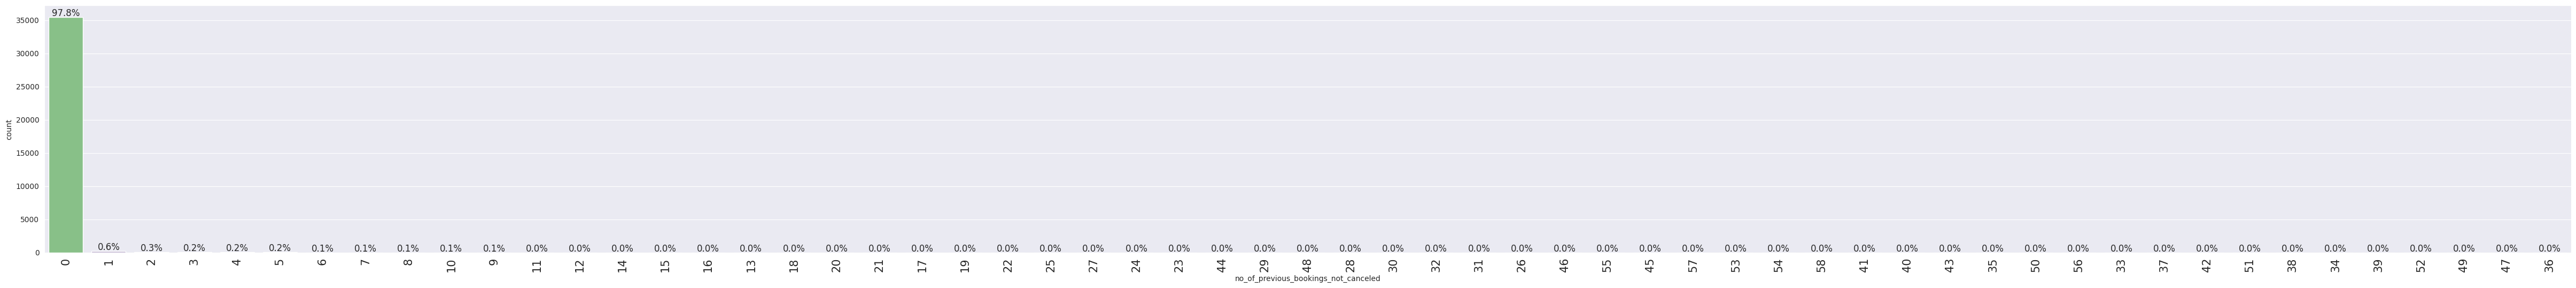

In [151]:
labeled_barplot(df,'no_of_previous_bookings_not_canceled', perc=True)

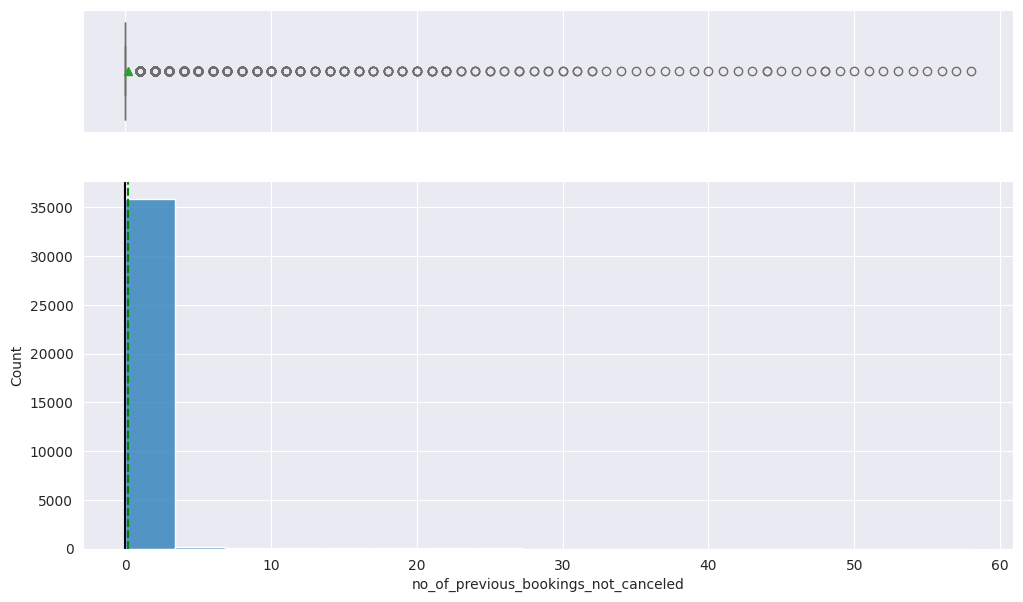

In [152]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

In [153]:
counts = df.no_of_previous_bookings_not_canceled.value_counts()
percs = df.no_of_previous_bookings_not_canceled.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
b=pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
b[(b['percentage']!='0.0%')]

,count,percentage
no_of_previous_bookings_not_canceled,,
0,35463,97.8%
1,228,0.6%
2,112,0.3%
3,80,0.2%
4,65,0.2%
5,60,0.2%
6,36,0.1%
7,24,0.1%
8,23,0.1%


observations:
* It appears that the majority of bookings (97.8%) have no previous bookings to be cancelled.
* The other 2.2% suggests that some customers have a track record of making and keeping their bookings without canceling them.

Average price per room

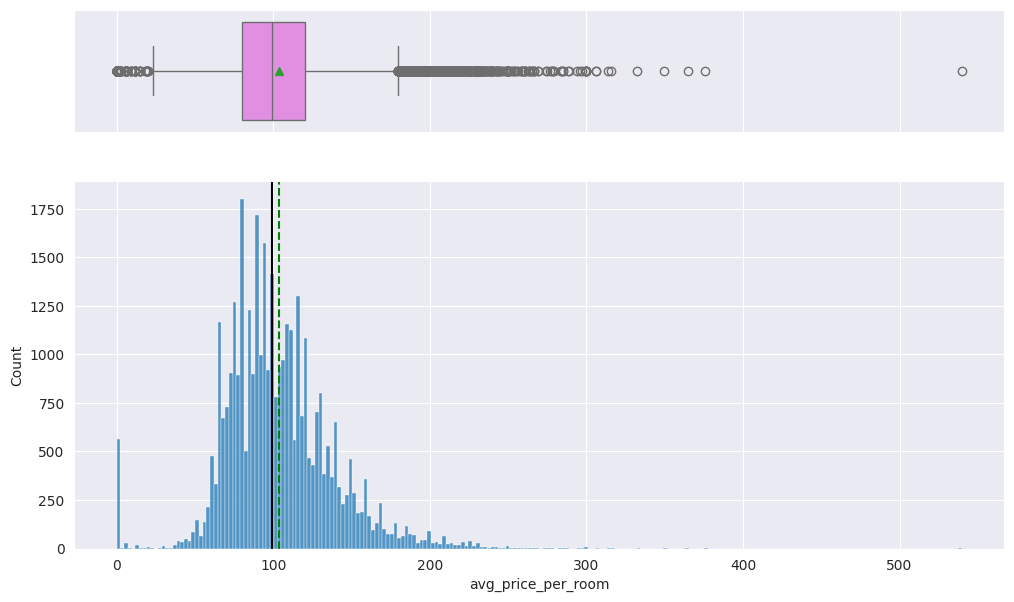

In [154]:
histogram_boxplot(df,'avg_price_per_room')

Observations:
* Distribution is right skewed, majority of the prices are concentrated towards the lower values and a few bookings with extreme prices.

Number of Special Requests

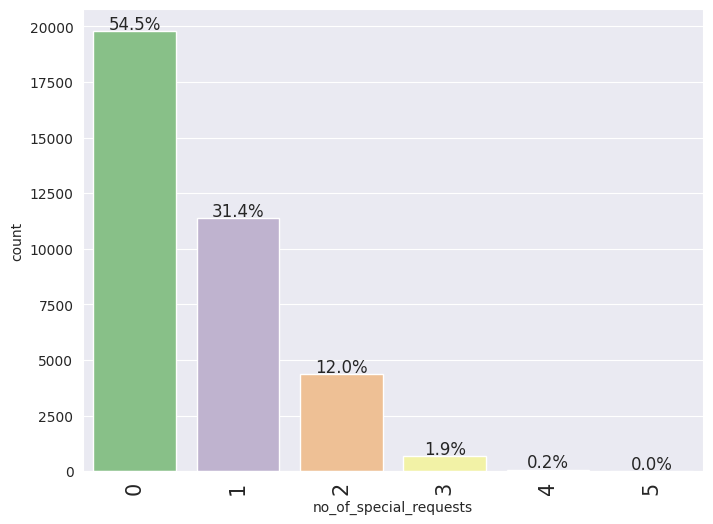

In [155]:
labeled_barplot(df,'no_of_special_requests', perc=True)

Booking Status

In [156]:
df['booking_status'] = df["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1) #converting canceled in 1 y not canceled in 0

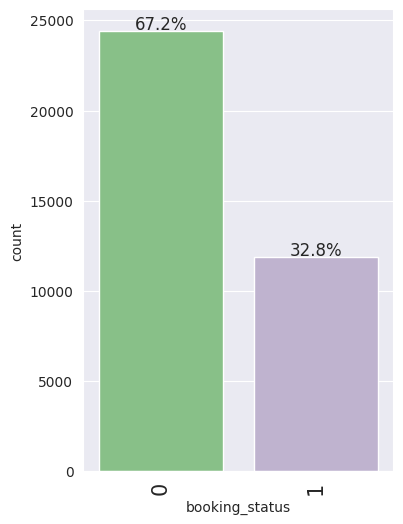

In [157]:
labeled_barplot(df,'booking_status', perc=True)

In [158]:
df['booking_status'].value_counts()

,count
booking_status,
0,24390
1,11885


Observations:
* We have 32.8% of the bookings canceled and 67.2% of the bookings, not canceled.

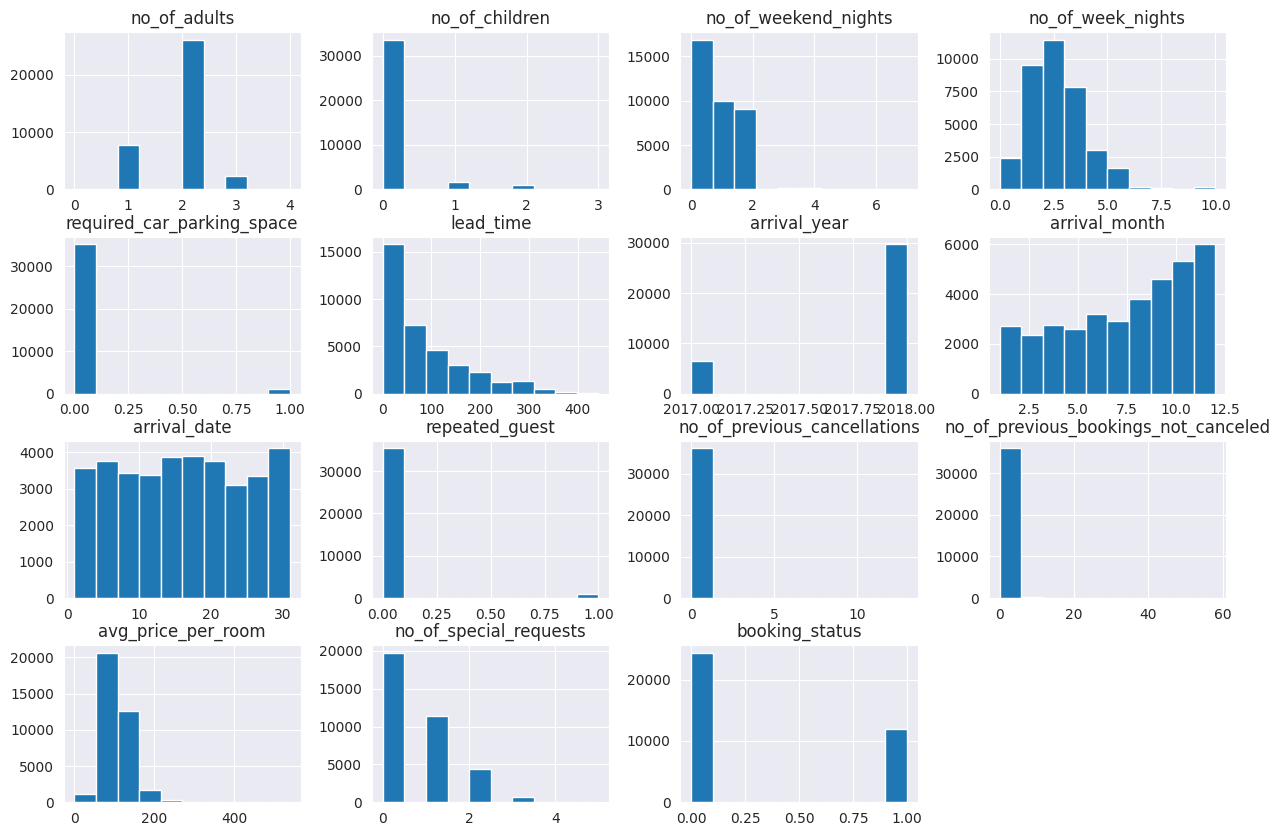

In [159]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10))
plt.show()

#### Bivariate Analysis

Correlation heat map

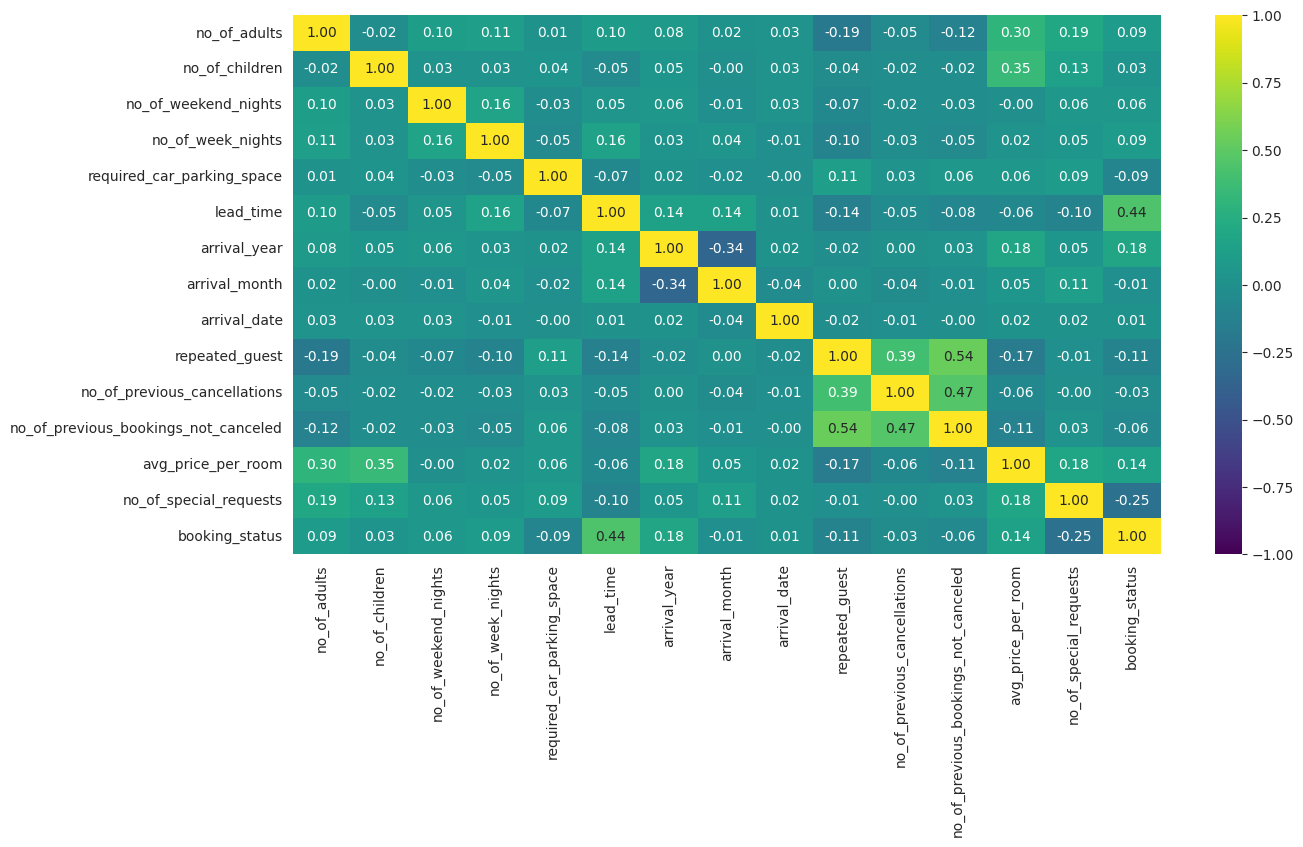

In [160]:
#create correlation heat map for numerical variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis'
)
plt.show()

Observations:
* Most of the variables shows no or essentially useless correlations.
* As the number of adults and children increase, the average price of a room can weakly be expected to increase.
* If a guest is a repeat guest, they are weakly more likely to have both previously cancelled and not cancelled a booking:
 * A repeat guest has more opportunities to decide to cancel or not cancel these previous bookings.
 * The weak positive correlation between number of previous cancellations and number of previous bookings not cancelled supports this conclusion.

Market_segment_type vs Avg_price_per_room

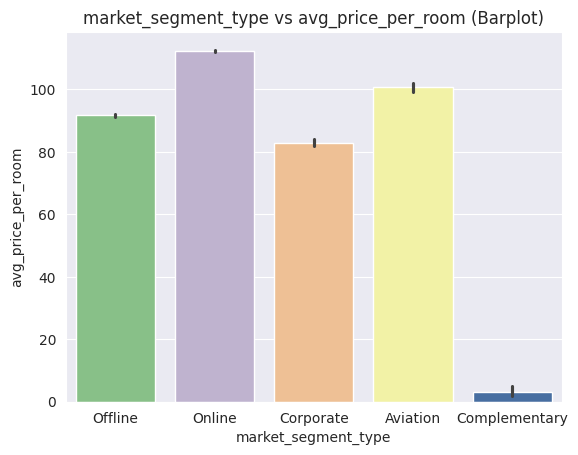

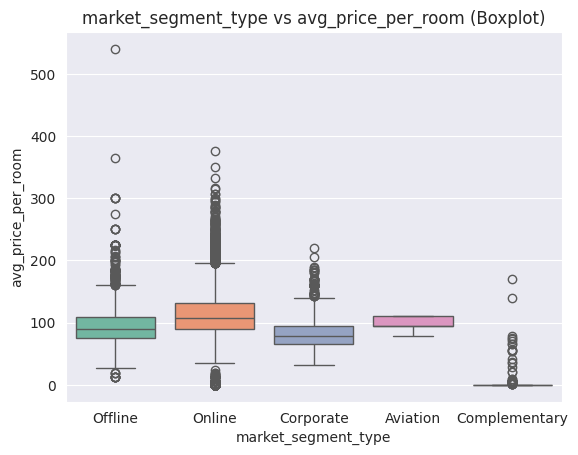

In [161]:
sns.barplot(data=df, x="market_segment_type", y="avg_price_per_room", palette= 'Accent')
plt.title('market_segment_type vs avg_price_per_room (Barplot)')
plt.show()
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', palette= 'Set2')
plt.title('market_segment_type vs avg_price_per_room (Boxplot)')
plt.show()

Observations:
* Online market appears to have the highest prices with an average of 113 euros, and the largest spread price with a minimum 0.5 and maximum of 375 euros. Having 75% of the bookings under 132 euros.

no_of_adults vs avg_price_per_room

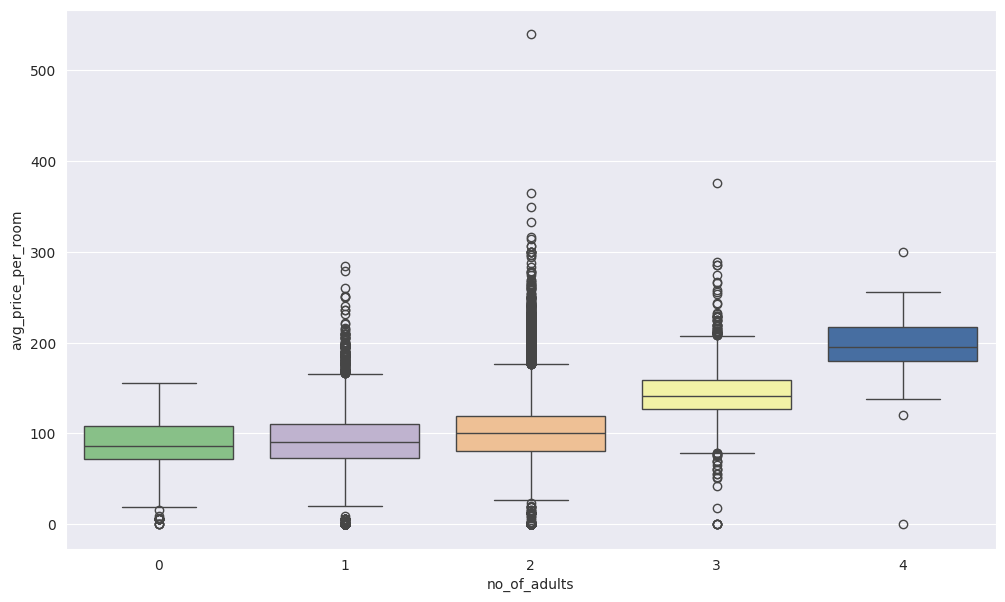

In [162]:
plt.figure(figsize=(12, 7))

sns.boxplot(data=df, x="no_of_adults", y="avg_price_per_room",palette= 'Accent')
plt.show()

Observations:
* As we saw in the heat map, there seems to be a correlation between the number of adults and the prices per room, as the prices per room tend to increase when the number of adults increases.

Repeated Guest vs Booking Status

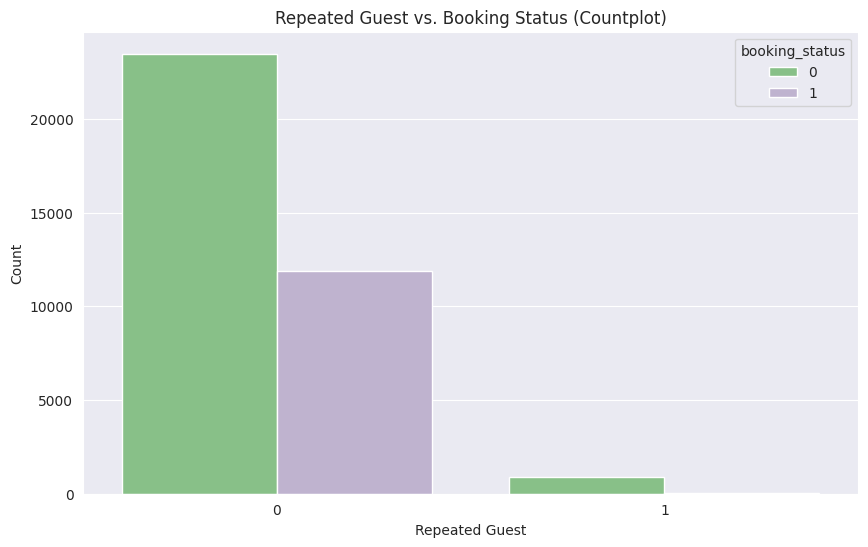

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="repeated_guest", hue="booking_status", palette='Accent')
plt.title('Repeated Guest vs. Booking Status (Countplot)')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.show()

### EDA Questions:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### What are the busiest months in the hotel?

In [164]:
df.groupby('arrival_month').count().sort_values(by='booking_status', ascending=False)['booking_status'].head(3)

,booking_status
arrival_month,
10,5317
9,4611
8,3813


Observations:
* The month of October is the busiest month for the hotel, followed by September and August.
*  These months experience higher demand and occupancy rates, likely due to various factors such as holidays, seasonal events, or favorable weather conditions. The hotel may need to plan accordingly and ensure sufficient resources and staffing during these peak months to provide a satisfactory experience for guests.

#### Which market segment do most of the guests come from?



In [165]:
df.groupby('market_segment_type').count().sort_values(by='booking_status', ascending=False)['booking_status']

,booking_status
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


Observations:
* The majority of guests come from the online market segment. This market segment has approximately 64% of the total guests. It indicates that a significant number of bookings are made through online channels such as hotel booking websites, online travel agencies, or direct online reservations.
*  The online market segment is followed by offline sources, which has about 29% of the total guests. These offline sources may include direct bookings through phone calls, walk-ins, or bookings made through traditional travel agencies. From this we can see a clear dominant market segment, which could help the hotel focus on marketing strategies and efforts on channels that generate the most bookings.

####Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [166]:
df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()

,market_segment_type,avg_price_per_room
0,Online,112.256855
1,Aviation,100.704000
2,Offline,91.632679
3,Corporate,82.911740
4,Complementary,3.141765


Observations:
* Online bookings yield the highest average price per room ($112.25), followed by bookings through Aviation and Offline market segments.
* On the other hand, the offline market segment tends to have relatively lower room prices compared to the online segment. This might be because offline bookings may involve direct negotiation with the hotel or traditional travel agencies, which could result in lower negotiated rates or special discounts.

#### What percentage of bookings are canceled?

In [167]:
df['booking_status'].value_counts()

,count
booking_status,
0,24390
1,11885


Observations:
* 11885 (33%) of the total 36275 bookings were cancelled.

#### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [168]:
df.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               0                 23476
                1                 11869
1               0                   914
                1                    16
Name: count, dtype: int64

Observations:
* Only 16 (2%) of the 930 total bookings made by repeated guest were cancelled.

####Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?




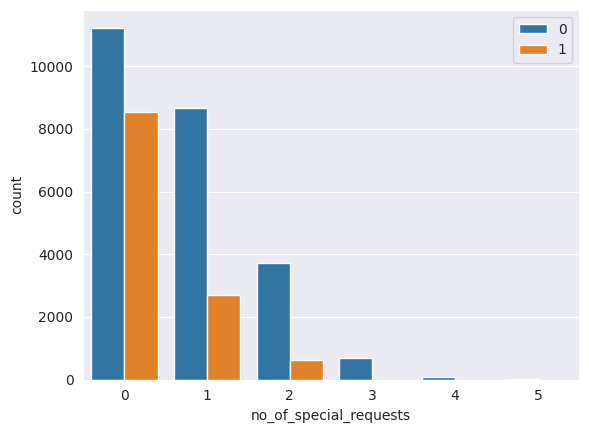

In [169]:
sns.countplot(data=df, hue='booking_status', x='no_of_special_requests')
plt.legend(loc='upper right')
plt.show()

Observations:
* As the number of special requests increases, the proportion of cancellations tends to decrease. This suggests that guests who make more special requests are less likely to cancel their bookings.


#### Data Preprocessing

In [170]:
missing_values = df.isnull().sum()
print(missing_values)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


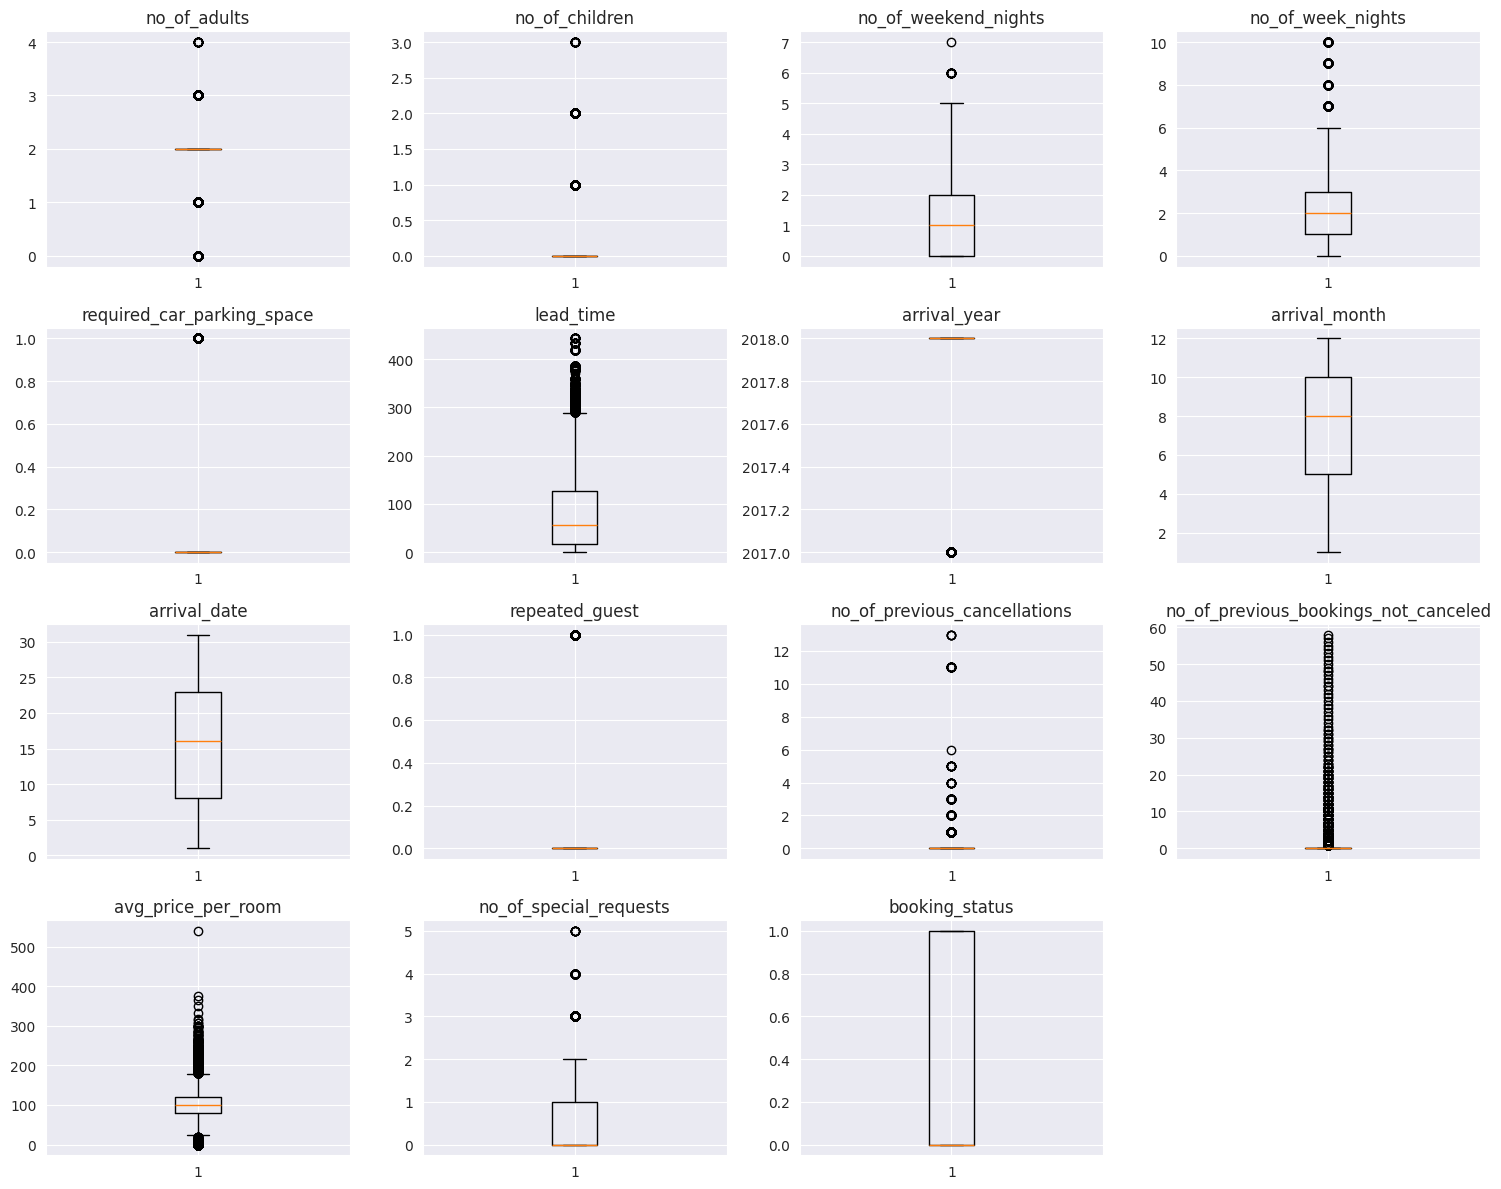

In [171]:
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
However, we will not treat them as they are proper values.

In [172]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [173]:
label_encoder = LabelEncoder()
df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])

In [174]:
scaler = StandardScaler()
numerical_columns = ['lead_time', 'avg_price_per_room', 'no_of_previous_cancellations']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [175]:
missing_values = df.isnull().sum()
print(missing_values)

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

missing_values_after_fill = df.isnull().sum()
print(missing_values_after_fill)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights    

In [176]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Testing data size: {X_test.shape[0]}')

Training data size: 29020
Testing data size: 7255


#### Model Building

#### Logistic Regression

In [177]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):


    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [178]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [179]:
X = df.drop(['booking_status', 'Booking_ID'], axis=1)

# Check the data types of the features to ensure they are numeric
print(X.dtypes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                               float64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object


In [180]:
model = LogisticRegression(solver="newton-cg", random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

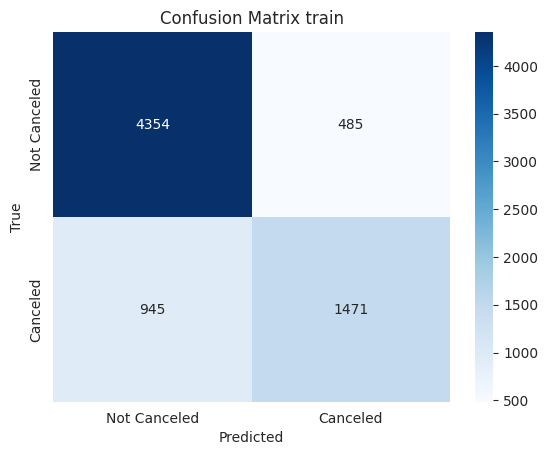

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix train')
plt.show()

In [182]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_classification_report = classification_report(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("\nClassification Report on Training Data:")
print(train_classification_report)

Training Accuracy: 0.8015851137146796

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     19551
           1       0.74      0.61      0.67      9469

    accuracy                           0.80     29020
   macro avg       0.78      0.75      0.76     29020
weighted avg       0.80      0.80      0.80     29020



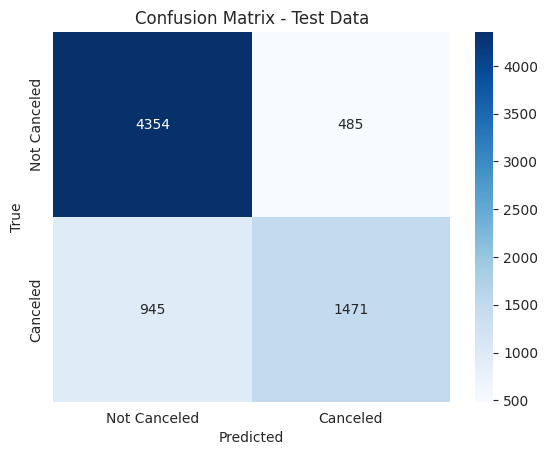

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [184]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Data:")
print(test_classification_report)


Test Accuracy: 0.80289455547898

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4839
           1       0.75      0.61      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.79      0.75      0.77      7255
weighted avg       0.80      0.80      0.80      7255



Model Performance Improvement

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
X_train_subsample = X_train.sample(frac=0.1, random_state=42)
y_train_subsample = y_train.loc[X_train_subsample.index]

param_dist = {
    'penalty': ['l2'],
    'C': [0.1, 1],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000),param_dist,n_iter=10,  cv=3,  scoring='roc_auc',  random_state=42, n_jobs=-1
)

In [186]:
random_search.fit(X_train_subsample, y_train_subsample)
print("Best Parameters:", random_search.best_params_)
best_lr = random_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test)
y_proba_tuned = best_lr.predict_proba(X_test)[:, 1]

print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

print("Tuned ROC-AUC Score:", roc_auc_score(y_test, y_proba_tuned))

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4839
           1       0.74      0.61      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.79      0.80      0.79      7255

Tuned ROC-AUC Score: 0.8543754165588917


Observations:
* Logistic Regression shows performance in the training and test that seems to be stable at 80 percent in the test set and approximately at 80 percent in the training set, thus not overfitting the train model, which generalizes perfectly with unseen data. The precision and recall values indicate that it balances the identification of cancellations without too many false positives, which makes it suitable for predicting booking cancellations with reasonable reliability.
*  The model's performance was evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, with the latter providing a comprehensive view of the classifier's ability to distinguish between cancellations and non-cancellations.
*  To improve the model's performance, RandomizedSearchCV was used to tune critical hyperparameters. The search focused on parameters like C (regularization strength), penalty (type of regularization, l1 or l2), and solver (optimization algorithm, e.g., liblinear). This approach ensured efficient exploration of the parameter space to find the best-performing combination.

### KNN Classifier

In [187]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

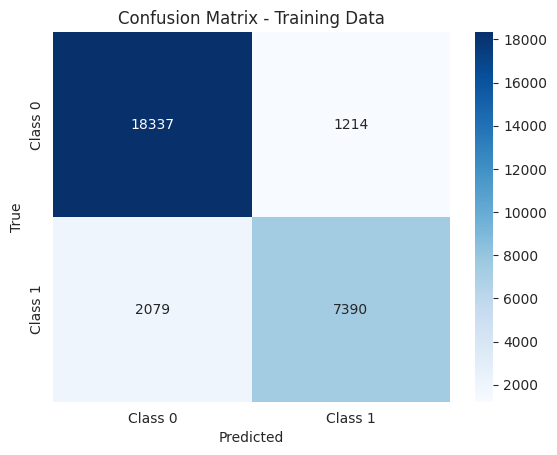

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = knn.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Data')
plt.show()

In [189]:
y_train_pred = knn.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_classification_report = classification_report(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("\nClassification Report on Training Data:")
print(train_classification_report)


Training Accuracy: 0.886526533425224

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     19551
           1       0.86      0.78      0.82      9469

    accuracy                           0.89     29020
   macro avg       0.88      0.86      0.87     29020
weighted avg       0.89      0.89      0.89     29020



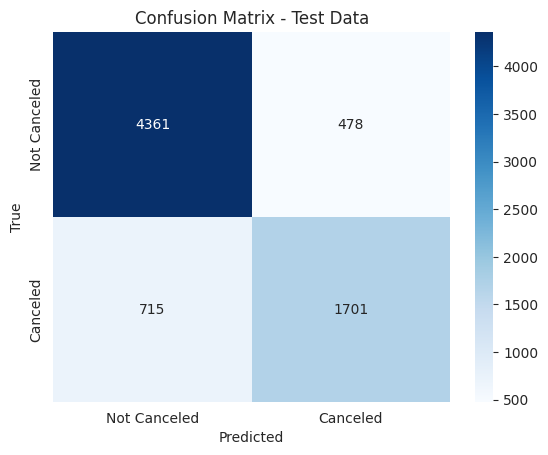

In [190]:
y_test_pred = knn.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [191]:
y_test_pred = knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_classification_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Data:")
print(test_classification_report)


Test Accuracy: 0.8355616815988973

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4839
           1       0.78      0.70      0.74      2416

    accuracy                           0.84      7255
   macro avg       0.82      0.80      0.81      7255
weighted avg       0.83      0.84      0.83      7255



In [192]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


In [193]:

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_knn = random_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix for Tuned Model:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report for Tuned Model:\n", classification_report(y_test, y_pred_tuned))

Best Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Tuned Model Accuracy: 0.8614748449345279
Confusion Matrix for Tuned Model:
 [[4442  397]
 [ 608 1808]]
Classification Report for Tuned Model:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4839
           1       0.82      0.75      0.78      2416

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255



Observations:
*  The KNN model represents a rather good balance of precision and recall, especially with respect to the test set.
*  Its accuracy in the test set is 83.56%, precision is 78.06%, recall is 70.41%, and F1-score is 74.04%, thereby effectively identifying the classes - canceled and non-canceled bookings.
*  It detects cancellation, keeping a good precision rate without increasing false positives too much. This balance makes KNN an application-practical model where it is critical to detect cancellations as well as minimizing false alerts.
*  Accuracy, precision, recall, and F1-score drop significantly between the training set and the test set.
*   Metrics in training are all higher, implying potential overfitting of the model. This means that KNN may perform well on the observed data but might not generalize too well to the unseen data.

#### Naive Bayes

In [194]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

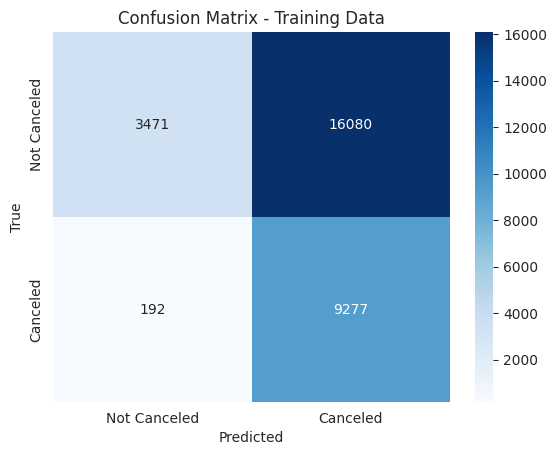

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = nb.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Data')
plt.show()

In [196]:
y_train_pred = nb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("\nClassification Report on Training Data:")
print(train_classification_report)


Training Accuracy: 0.4392832529290145

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.95      0.18      0.30     19551
           1       0.37      0.98      0.53      9469

    accuracy                           0.44     29020
   macro avg       0.66      0.58      0.42     29020
weighted avg       0.76      0.44      0.38     29020



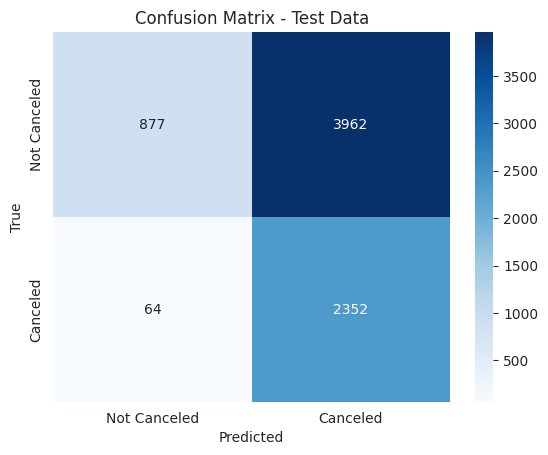

In [197]:
y_test_pred = nb.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [199]:
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Data:")
print(test_classification_report)


Test Accuracy: 0.4450723638869745

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.18      0.30      4839
           1       0.37      0.97      0.54      2416

    accuracy                           0.45      7255
   macro avg       0.65      0.58      0.42      7255
weighted avg       0.75      0.45      0.38      7255



Observations:
* The Naive Bayes model displays substantial imbalance between the precision and recall values for the two classes; it has a high recall for class "1" (cancelled bookings) but very low precision for both classes, which means that even though the model is very efficient in detecting cancellations, it is not able to suppress false positives, hence possible misclassification of non-cancellations as cancellations.
* The low accuracy of about 44% on both train and test sets, also with a poor F1 score, may indicate that the Naive Bayes class might not be the very best fit for this issue. Its failure to adequately classify between false positives and negatives negatively impacts its performance while trying to predict cancellations in bookings.

#### SVM Classifier

In [200]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [201]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

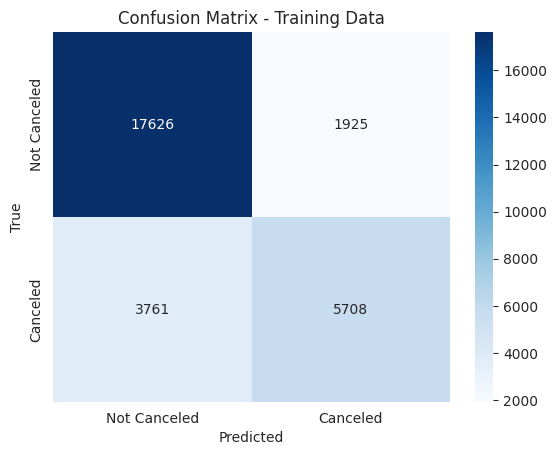

In [203]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Data')
plt.show()

In [202]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")


Training Set Metrics:
Accuracy: 0.8041
Precision: 0.7992
Recall: 0.8041
F1-Score: 0.7979


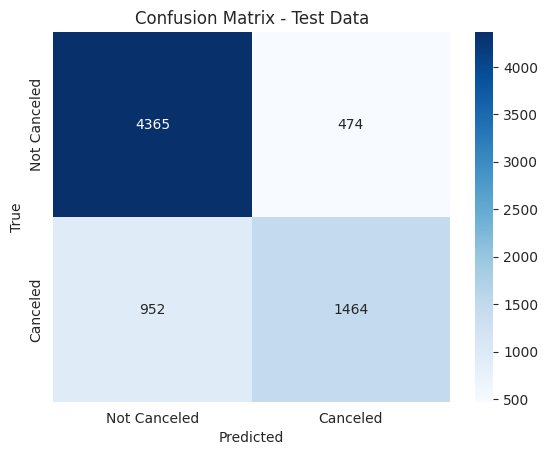

In [207]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [206]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

Test Set Metrics:
Accuracy: 0.8034
Precision: 0.7991
Recall: 0.8034
F1-Score: 0.7973


In [208]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}


In [211]:
random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

In [213]:
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_svm = random_search.best_estimator_

y_pred_tuned = best_svm.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix for Tuned Model:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report for Tuned Model:\n", classification_report(y_test, y_pred_tuned))

Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Tuned Model Accuracy: 0.8002756719503791
Confusion Matrix for Tuned Model:
 [[4357  482]
 [ 967 1449]]
Classification Report for Tuned Model:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      4839
           1       0.75      0.60      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.80      0.80      0.79      7255



Observations:
* The SVM model exhibited consistent accuracy and F1-scores across both training and test datasets, demonstrating its ability to generalize effectively without overfitting. This consistency indicates the model's reliability in making accurate predictions on unseen booking data.

* The model's near-equal precision and recall values highlight its balanced performance in correctly identifying cancellations while minimizing false positives, making it suitable for actionable strategies like targeted interventions or overbooking policies.

* To enhance the performance of the SVM model, a RandomizedSearchCV was performed with the tuning of the following hyperparameters:

    * C: Regularization parameter, tested with values [0.1, 1, 10] for balancing the trade-off between margin size and misclassification.
    * kernel: Explored both linear and rbf kernels to determine the best fit for data patterns.
    * gamma: Scale adjusted and auto settings, that affect the flexibility of the decision boundary for non-linear kernels.

#### Actionable Insights & Recommendations

In [220]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=1, probability=True)
svm.fit(X_train, y_train)

svm_perf_test = model_performance_classification_sklearn(svm, X_test, y_test)

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
    'Accuracy': [log_reg_model_test_perf['accuracy'], knn_perf_test['accuracy'], nb_perf_test['accuracy'], svm_perf_test['accuracy']],
    'Precision': [log_reg_model_test_perf['precision'], knn_perf_test['precision'], nb_perf_test['precision'], svm_perf_test['precision']],
    'Recall': [log_reg_model_test_perf['recall'], knn_perf_test['recall'], nb_perf_test['recall'], svm_perf_test['recall']],
    'F1-Score': [log_reg_model_test_perf['f1'], knn_perf_test['f1'], nb_perf_test['f1'], svm_perf_test['f1']],
    'ROC-AUC': [log_reg_model_test_perf['roc_auc'], knn_perf_test['roc_auc'], nb_perf_test['roc_auc'], svm_perf_test['roc_auc']]
})

model_comparison

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.802895,0.752045,0.608858,0.672919,0.854872
1,KNN,0.835562,0.780633,0.704056,0.740370,0.887363
2,Naive Bayes,0.445072,0.372506,0.973510,0.538832,0.817902
3,SVM,0.666988,0.000000,0.000000,0.000000,0.833059


Observations:
*  Logistic Regression provides good performance with a balanced precision and recall, leading to a solid F1-score and a high ROC-AUC. However, it could still be improved in terms of recall, as it misses some of the positive cases.
* KNN shows the best overall performance in terms of accuracy, precision, and recall. Its balanced performance across these metrics, combined with a high ROC-AUC, makes it a strong candidate for the final model.
* Naive Bayes performs poorly in terms of accuracy and precision, despite achieving a very high recall. This suggests that it is predicting many false positives (low precision), and the model might not be well-suited for this particular problem.
* The SVM model has failed to predict any positive cases, leading to a precision, recall, and F1-score of zero. This indicates that the model is likely overfitting or having trouble with the data's characteristics. The ROC-AUC is still decent, suggesting it is discriminating between the classes at some level, but the performance is very poor for practical use.

#### Final Model Selection:
Based on the comparison, KNN emerges as the best model:

It has the highest accuracy, precision, recall, and F1-score.
It also achieves the highest ROC-AUC, indicating the best overall performance in distinguishing between classes.

### Actionable Business Recommendations
*  To enhance customer satisfaction and retention, INN Hotels Group should work on creating a seamless booking experience by putting in place user-friendly online systems that have real-time availability and dynamic pricing updates
*  Personalized booking confirmations and timely reminders can reduce no-shows and cancellations. Moreover, flexible cancellation policies, like partial refunds for cancellations within a certain period, can create goodwill among customers while still reducing revenue loss.
* Booking cancellations can be reduced by using the insights from the KNN model to identify high-risk bookings and engage customers with personalized incentives like discounts or room upgrades. Flexible pricing options, such as non-refundable discounts or premium flexible rates, secure revenue
* Expanding loyalty programs with special rewards such as free upgrades, free amenities, or priority booking can help increase repeat stays and customer relationships. Targeted email and SMS marketing campaigns based on customer behavior, such as booking history and preferences, can drive engagement.
* Collaborating with travel agencies and corporate clients for bulk bookings can diversify revenue streams and ensure stable occupancy rates during low seasons.

